In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload

In [2]:
%autoreload 2
import sys
sys.path.append('..')

from utils.data_loader import DataLoader
#from utils.term_frequency_helper import TermFrequency, TfIdf
from utils.test import TermFrequency, TfIdf
from utils.data_frame_helper import DataFrameHelper

In [3]:
loader = DataLoader()
content = loader.load_data("../Data/trainingdata.txt")

Number of Sentences:  5485



In [4]:
# List topic labels for sentences.
label_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H"])
df = loader.get_data_frame(content, label_names)
df_helper = DataFrameHelper(df, label_names)

In [5]:
df_helper.df.head()

,Labels,Text
0,A,champion products ch approves stock split cham...
1,B,computer terminal systems cpml completes sale ...
2,A,cobanco inc cbco year net shr cts vs dlrs net ...
3,A,am international inc am nd qtr jan oper shr lo...
4,A,brown forman inc bfd th qtr net shr one dlr vs...


In [6]:
from utils.test import TermFrequency, TfIdf

In [7]:
# min_df = 2

# tf = TermFrequency(
#     label_names,
#     lowercase=True,
#     preprocessor=None,
#     tokenizer=None,
#     stop_words='english',
#     ngram_range=(1, 1),
#     analyzer='word',
#     max_df=1.0,
#     min_df = min_df,
#     max_features=None,
#     vocabulary=None)

# tf.vectorize_corpus(df_helper.corpus_matrix)

In [8]:
min_df = 2

tf = TfIdf(
    label_names,
    norm='l2',
    smooth_idf = True,
    sublinear_tf = False,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words='english',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df = min_df,
    max_features=None,
    vocabulary=None)

tf.vectorize_corpus(df_helper.corpus_matrix)

In [9]:
tf.X.sum(axis = 0).getA().squeeze().max()

3.7251282173057163

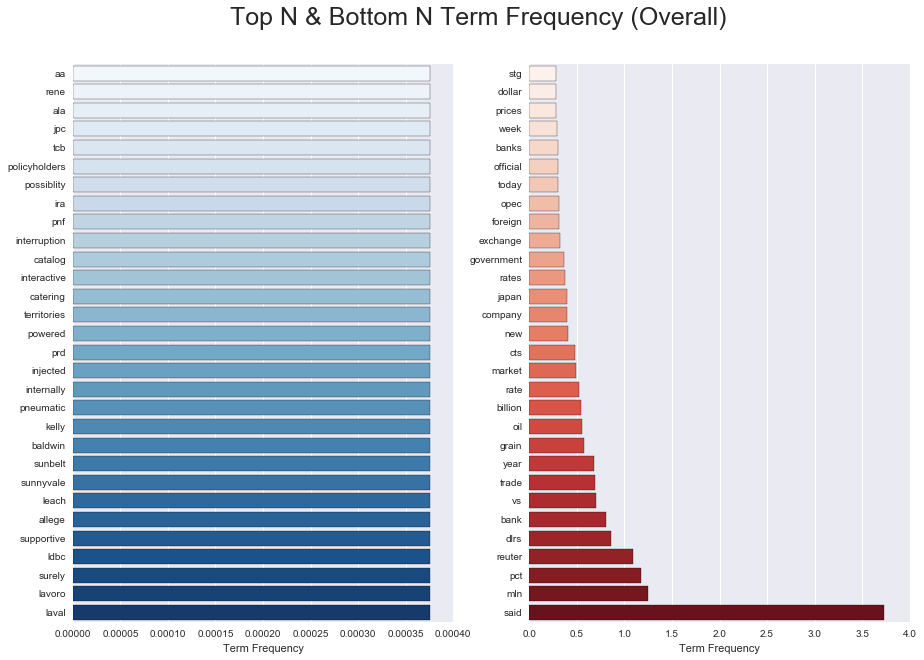

In [10]:
tf.plot_term_freq_dist(N = 30, per_label = False)

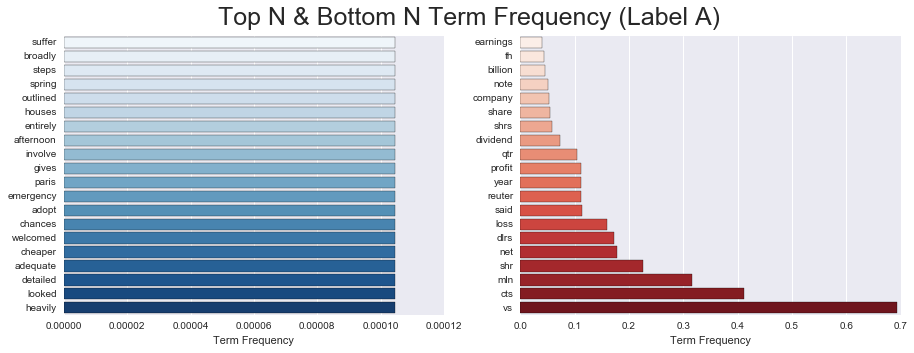

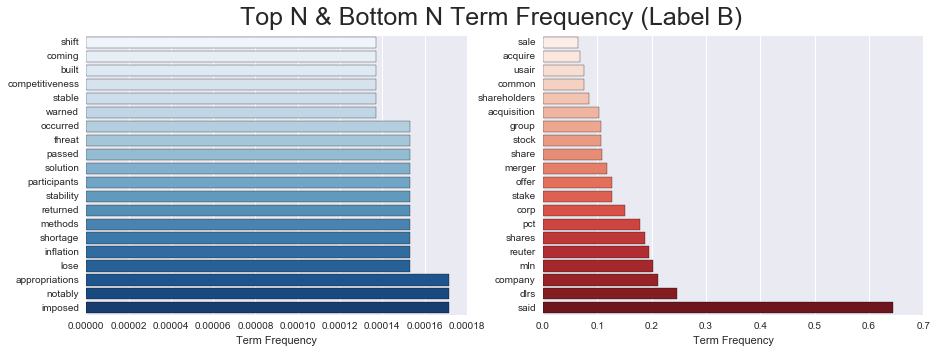

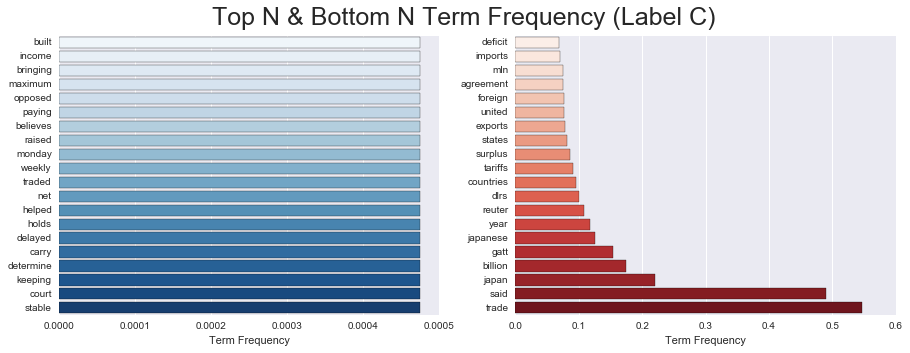

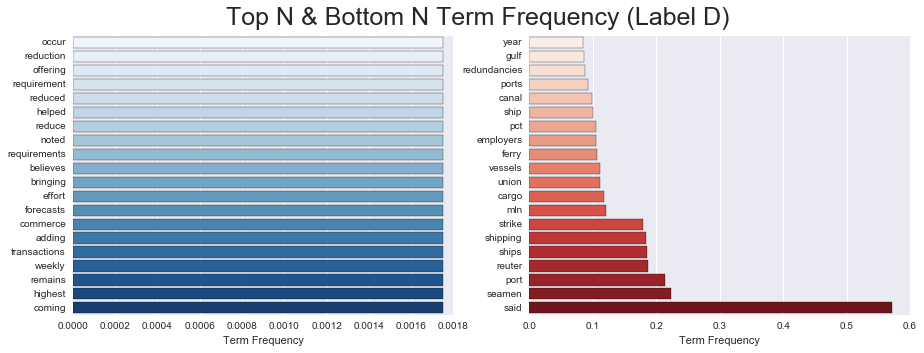

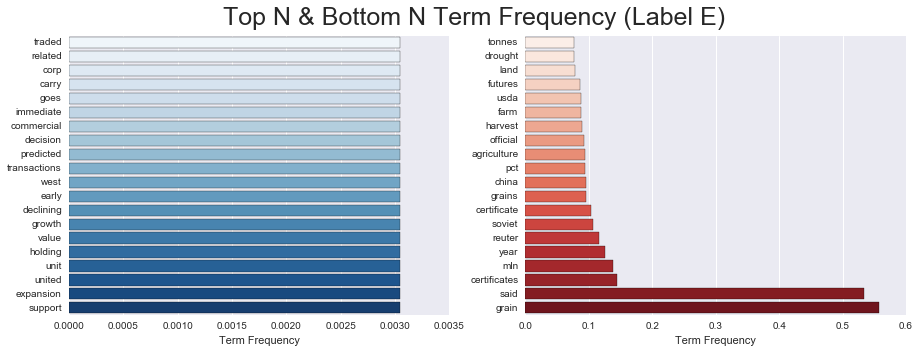

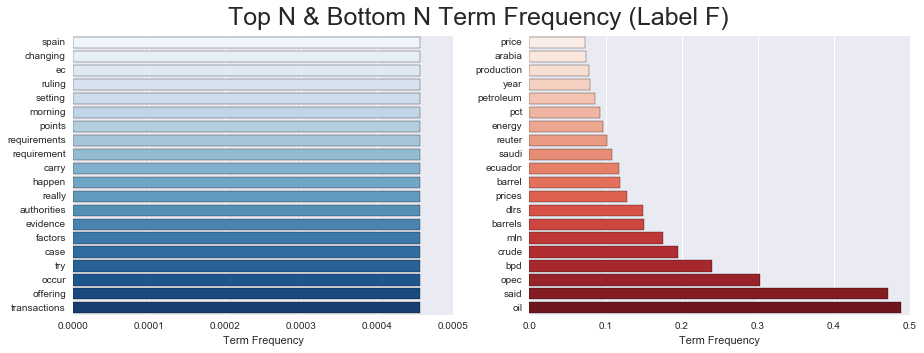

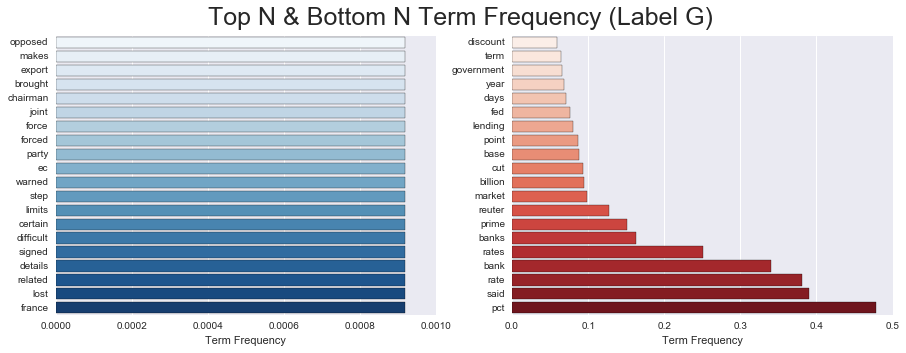

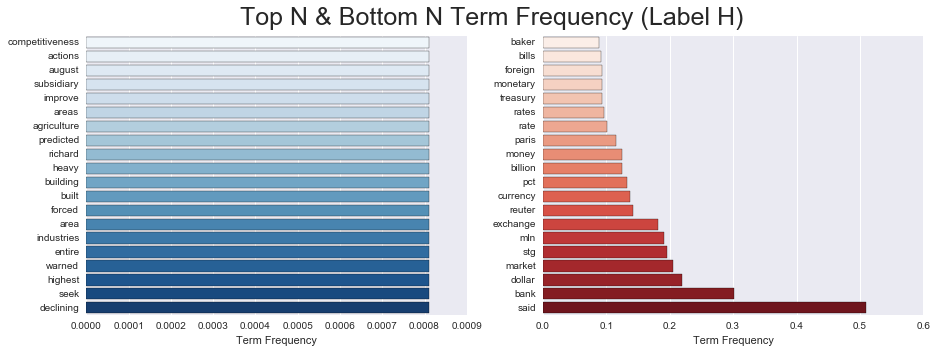

In [11]:
tf.plot_term_freq_dist(N = 20, per_label = True)